# Perceptron 

- It's a basic model of Neural Network
- This algorith uses a step function to its classification
- It is a model of a single neuron that can be used for two-class classification problems
- It provides the foundation for later developing much larger networks (like Multi Layer Perceptron)
- It was one of the first models
    - _STEP_ function for binary classification
    - X1 and X2 multiplies by the wights and compare it with the BIAS
        - higher than X0 = bias = 1 ---> entra na classe 1
        - lower than X0 = bias ----> classe 0
    - X0 . theta0 + X1 . theta1 + X2 . theta2 

![perceptron](https://c.mql5.com/2/41/512210577402.png)

## Introduction

Perceptron was inspired in the human brain, specifically by the information processing of a single neural cell called a neuron.

Invented by Frank Rosenblatt, based in **McCulloch-Pitts** 's neuron.

- McCulloch-Pitts was different because it didn't had weights.
- This was a major advance for the perceptron, with weights we can do much more
- It's very basic, so now it's not used anymore ( perceptron )
- But the concept is simple and important for further comprehension
- The neuron's type is SIGMOIDAL -> trades the step function for the sigmoide function

## Implementation

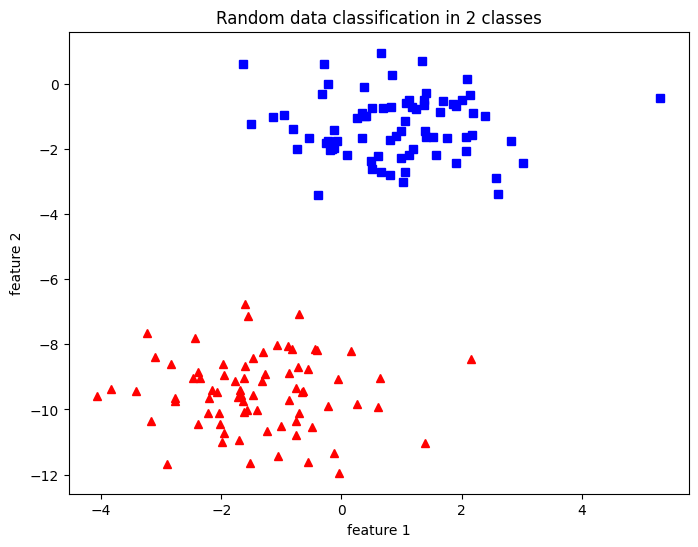

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# generating data for classification
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

#Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random data classification in 2 classes')
plt.show()

In [5]:
# implementing the Perceptron:
learning_rate = 0.5  # setting the learning rate, it's like the step of the coast function.
epochs = 100         # Number of iterations

# m-> trainning samples
# n-> features for each sample
m, n = X.shape

In [7]:
# creating the step function:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [9]:
# starting the weights (theta) with zero
# n+1 number of weighs + 1 that is the bias
theta = np.zeros((n+1,1))

# list of the missed results - wrongly classified for each iteration
n_miss_list = []

# trainning
for epoch in range(epochs):    # epochs = 100

    # variável que armazena número de amostras classificadas com rótulo errado.
    n_miss = 0

    # each trainning sample
    for idx, x_i in enumerate(X):

        # 1 is the first position of the feature vector
        # that value is multiplied by the weight, theta_0, that meand, the bias
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)

        # estimating the new label
        y_hat = step_func(np.dot(x_i.T, theta))

        # Compare the predicted label with the real one
        # squeeze removes one dimension
        if (np.squeeze(y_hat) - y[idx]) != 0:
            # if the classifier make some mistake, the error != 0, the weights (theta) will be optimized 
            theta += learning_rate*((y[idx] - y_hat)*x_i)

            # error count 
            n_miss += 1

    # at the end of this epoch, the error count is added at the list
    n_miss_list.append(n_miss)

## Evaluating the model:

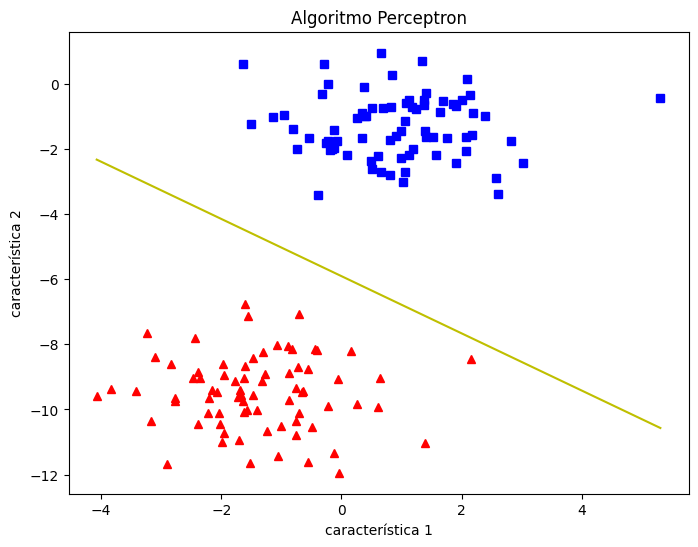

In [11]:
# y = mx+c = theta0.X0 + theta1.X1 + theta2.X2
# silving this, we can find who is m and c (angular and linear coeff.)
x1 = [min(X[:,0]), max(X[:,0])]
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
x2 = m*x1 + c

# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("característica 1")
plt.ylabel("característica 2")
plt.title('Algoritmo Perceptron')
plt.plot(x1, x2, 'y-')
plt.show()

## Perceptron using `sklearn`


In [12]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X, y = load_digits(return_X_y=True)

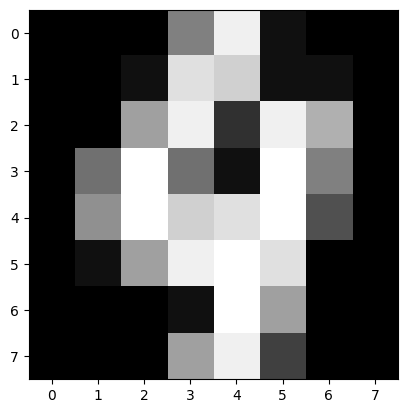

In [17]:
# Looking at some digits
sample = np.random.randint(0, len(X))
img = X[sample].reshape((8,8)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")
plt.show()

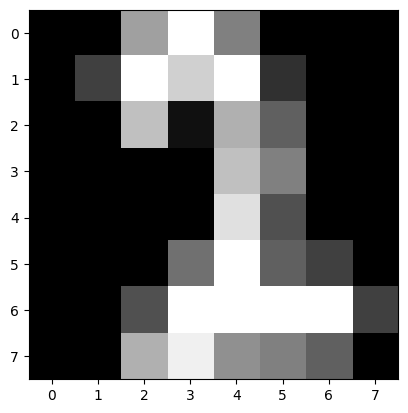

In [18]:
# Looking at some digits
sample = np.random.randint(0, len(X))
img = X[sample].reshape((8,8)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")
plt.show()

In [19]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [20]:
# instantiating the Perceptron model
# tol: stopping critirion    |   random_state: the shuffle will always occur in the same way
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)         # training the model

x_test = scaler.transform(x_test)
y_pred = clf.predict(x_test)
print('accuracy in TRAINING = ', clf.score(x_train, y_train))
print('accuracy in TEST     = ', clf.score(x_test, y_test))

accuracy in TRAINING =  0.9805149617258176
accuracy in TEST     =  0.9361111111111111


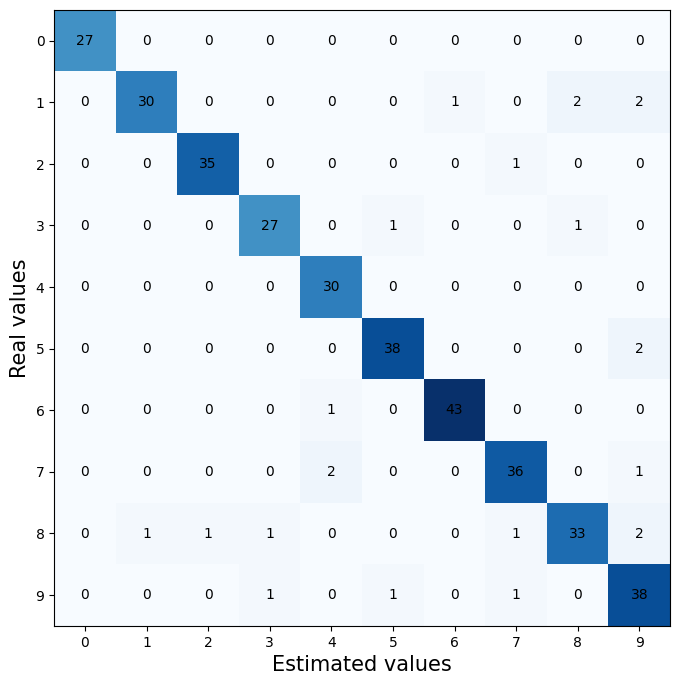

In [21]:
# Instantiating and plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Estimated values', fontsize=15, color='black')
ax.set_ylabel('Real values', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()


- Looking at the confusion matrix, we see that most of the estimated values correspond to the real values
- the model made good predictions, the accuracy in test set is 0.93610

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.86      0.91        35
           2       0.97      0.97      0.97        36
           3       0.93      0.93      0.93        29
           4       0.91      1.00      0.95        30
           5       0.95      0.95      0.95        40
           6       0.98      0.98      0.98        44
           7       0.92      0.92      0.92        39
           8       0.92      0.85      0.88        39
           9       0.84      0.93      0.88        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



## Limitations

1) perceptron can't be used to solve non-linear problems
2) It is used only for binary classification
3) With the **step function**, small variations in the weights lead to major output changes. This problem makes it impossible to use optimization algorithms, such as Gradient descent, that limits the network (to build multi layer perceptron)

- To address this last limitation, it is possible to REPLACE the activation function: **step** -----> **sigmoid**.


## Sigmoidal Neuron
- step function: is 'hard', small weight variations implicate in major output changes
- sigmoidal function: is 'soft', small weight variations lead to small output changes. 
   - output values : 0 or 1
   - Now we can use the gradient descent, using along with backpropagation for deeper networks.
   
    - Equations:
        - Imagine that $z \equiv \theta x + b$ is a high positive value:
            - then $e^{−z}\approx 0$ e $\sigma(z) \approx 1$, like it would be in perceptron if $\theta x + b$ was also high. 
        - similarlly, if $z \equiv \theta x + b$ is a high negative value:
            - then $e^{−z}\approx \infty$ e $\sigma(z) \approx 0$, like it would be in perceptron if $\theta x + b$ was high (negtive direction). 
        - The difference between the models is that $z \equiv \theta x + b$ has a moderated size, in which the sigmoid variates in $0$ e $1$ (when $z \equiv 0$ the sigmoid output is $0.5$).
    